# 💬 LinkedIn Yorum Analizi ve Duygu Sınıflandırması

Bu proje, LinkedIn kullanıcı yorumlarını analiz ederek temel istatistiksel bilgileri çıkarır, duygu sınıflandırması yapar ve sonuçları çeşitli görsellerle sunar.


## 1. Veri Yükleme ve İlk İnceleme

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Veriyi yükle
linkedinData = pd.read_csv("data/data.csv")

# İlk 5 satırı görüntüle
linkedinData.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [3]:
# Bilgi özeti
linkedinData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


## 2. Rating Dağılımı

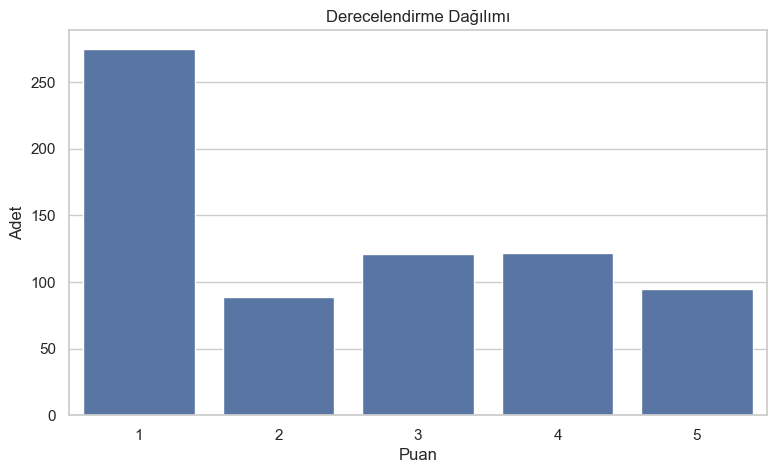

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=linkedinData, x='Rating')
plt.title('Derecelendirme Dağılımı')
plt.xlabel('Puan')
plt.ylabel('Adet')
plt.show()


## 3. Yorum Uzunluklarının Dağılımı

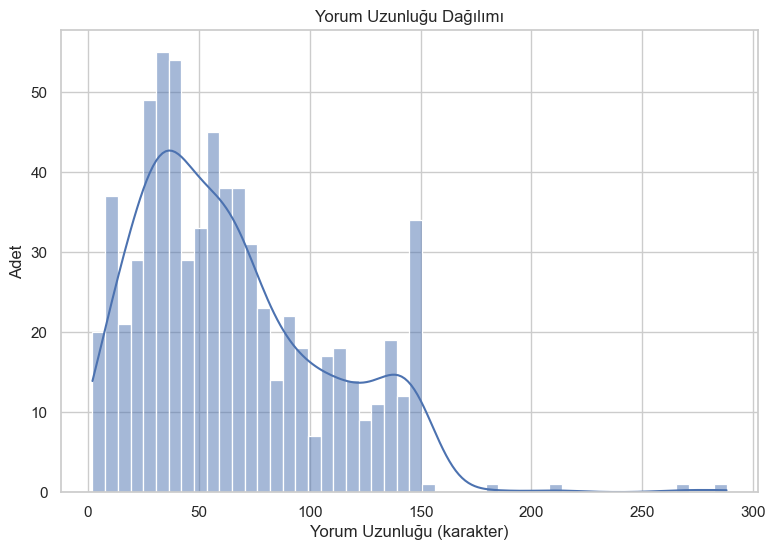

In [5]:
# Her yorumun karakter uzunluğu
linkedinData['Review Length'] = linkedinData['Review'].apply(len)

# Dağılım grafiği
plt.figure(figsize=(9, 6))
sns.histplot(linkedinData['Review Length'], bins=50, kde=True)
plt.title('Yorum Uzunluğu Dağılımı')
plt.xlabel('Yorum Uzunluğu (karakter)')
plt.ylabel('Adet')
plt.show()


## 4. TextBlob ile Duygu Sınıflandırması

In [6]:
from textblob import TextBlob

# Polarity değerine göre sınıflandır
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Uygula
linkedinData['Sentiment'] = linkedinData['Review'].apply(textblob_sentiment_analysis)

# İlk birkaç satırı göster
linkedinData[['Review', 'Sentiment']].head()


,Review,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,Negative
1,Force close(galaxy tab),Neutral
2,Slow and it tries to upload your contacts with...,Negative
3,Add ability to customize the profile and move ...,Neutral
4,"Good app, but it's a pain that it's not possib...",Positive


## 5. Duygu Dağılımı Görselleştirmesi

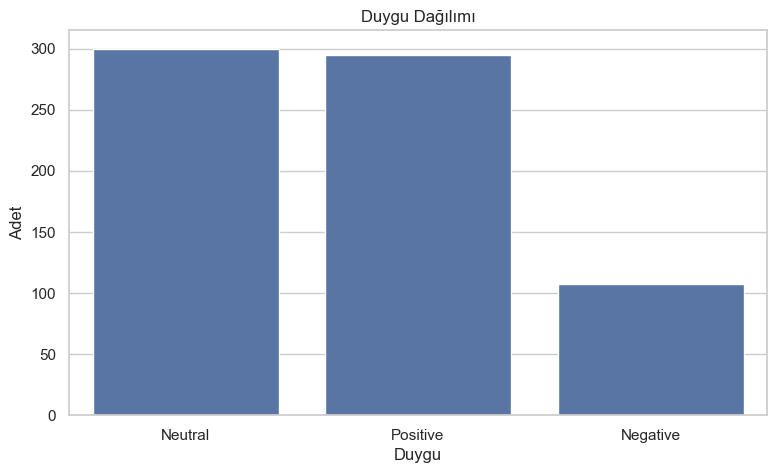

In [7]:
sentiment_distribution = linkedinData['Sentiment'].value_counts()

plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Duygu Dağılımı')
plt.xlabel('Duygu')
plt.ylabel('Adet')
plt.show()


## 6. Rating ve Duygu İlişkisi

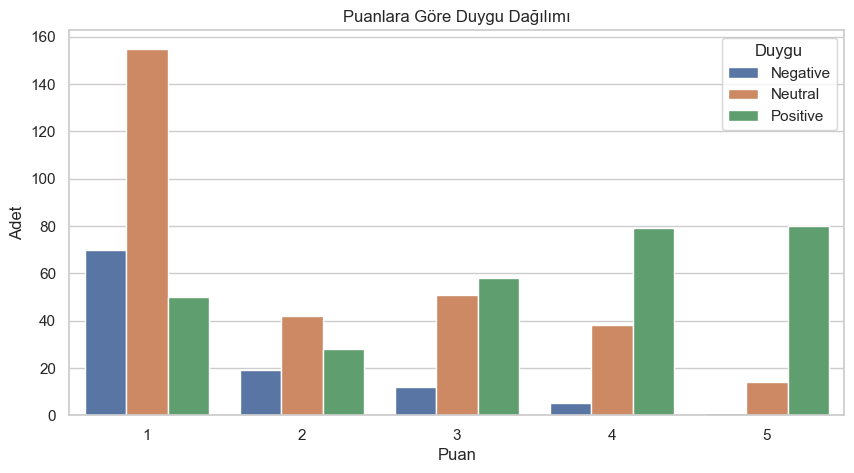

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=linkedinData, x='Rating', hue='Sentiment')
plt.title('Puanlara Göre Duygu Dağılımı')
plt.xlabel('Puan')
plt.ylabel('Adet')
plt.legend(title='Duygu')
plt.show()


## 7. WordCloud Görselleştirmesi

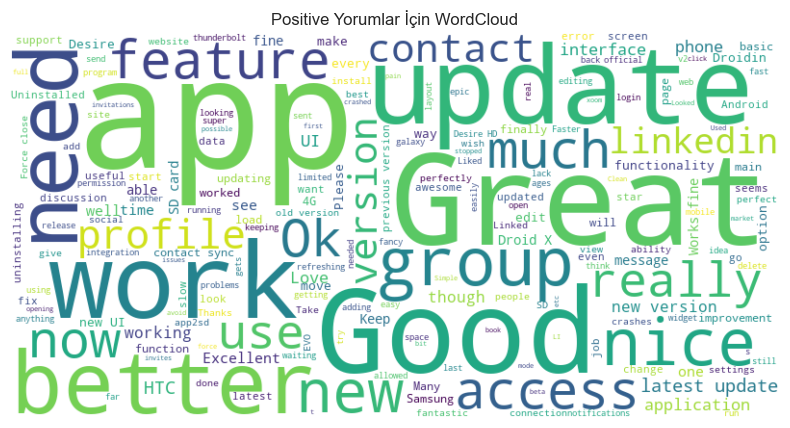

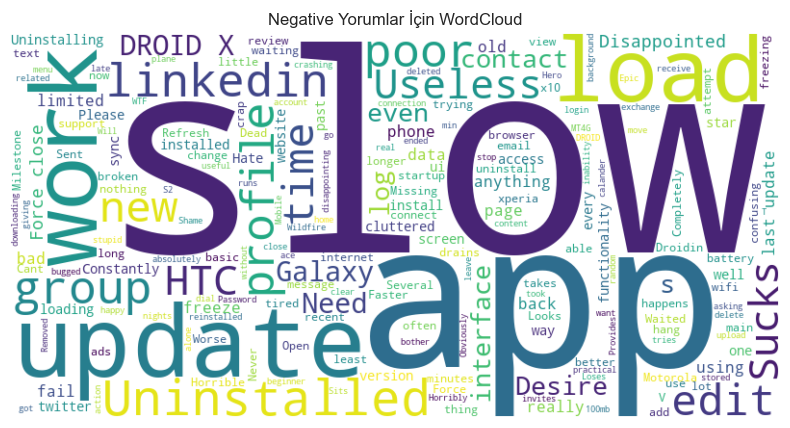

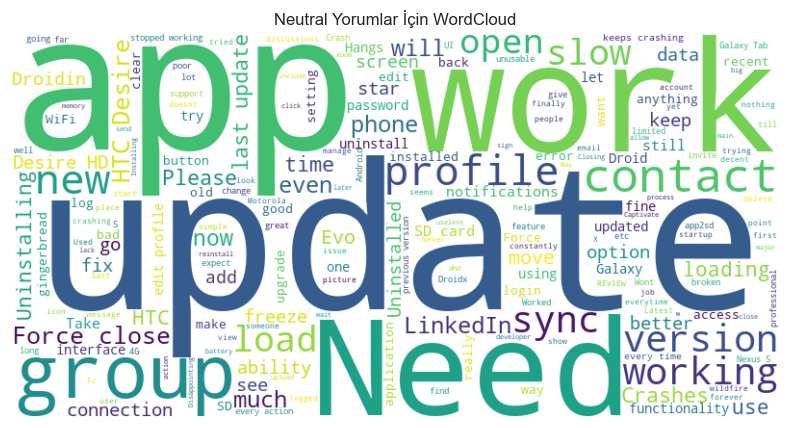

In [9]:
from wordcloud import WordCloud

# Belirli duygu için WordCloud oluştur
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in linkedinData[linkedinData['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{sentiment} Yorumlar İçin WordCloud')
    plt.axis('off')
    plt.show()

# Her duygu için WordCloud çiz
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)
